In [28]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
import time

In [29]:
gdf = pd.read_csv("data/AMZN/aggregate/AMZN_growth.csv")
pdf = pd.read_csv("data/AMZN/aggregate/AMZN_complete.csv")

In [30]:
gdf['Date'] = pd.to_datetime(gdf['Timestamp']).dt.date
pdf['Date'] = pd.to_datetime(pdf['Timestamp']).dt.date 
print("Growth DataFrame columns: ", gdf.columns)
print("Price DataFrame columns: ", pdf.columns)

Growth DataFrame columns:  Index(['Unnamed: 0', 'Unix', 'Timestamp', '900', '1800', '3600', '7200',
       '10800', 'Date'],
      dtype='object')
Price DataFrame columns:  Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unix', 'Date'], dtype='object')


In [45]:
def instancesOfGrowth(gdf):
    """
    Testing to see what percentage gains are normal in short time periods
    """
    print(gdf.loc[gdf["900"].idxmax(), "Timestamp"])
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - -")
    for i in [0.1, 0.01, 0.005]:
        print("     900   |", i, "instances",  len(gdf[gdf["900"] > i]))
        print("     1800  |", i, "instances",  len(gdf[gdf["1800"] > i]))
        print("     3600  |", i, "instances",  len(gdf[gdf["3600"] > i]))
        print("     7200  |", i, "instances",  len(gdf[gdf["7200"] > i]))
        print("     10800 |", i, "instances",  len(gdf[gdf["10800"] > i]))
        print("- - - - - - - - - - - - - - - - - - - - - - - - - - -")

# def instancesOfSustainedGrowth(gdf, growth, instances, period):
#     """ 
#     Testing to see what percentage gains are sustained
#     Want to find a day with multiple instance of growth at a certain percentage
#     """


instancesOfGrowth(gdf)

2024-04-29 21:18:00
- - - - - - - - - - - - - - - - - - - - - - - - - - -
     900   | 0.1 instances 6
     1800  | 0.1 instances 6
     3600  | 0.1 instances 6
     7200  | 0.1 instances 7
     10800 | 0.1 instances 21
- - - - - - - - - - - - - - - - - - - - - - - - - - -
     900   | 0.01 instances 820
     1800  | 0.01 instances 1855
     3600  | 0.01 instances 4231
     7200  | 0.01 instances 9731
     10800 | 0.01 instances 14545
- - - - - - - - - - - - - - - - - - - - - - - - - - -
     900   | 0.005 instances 4216
     1800  | 0.005 instances 8618
     3600  | 0.005 instances 16986
     7200  | 0.005 instances 28623
     10800 | 0.005 instances 35238
- - - - - - - - - - - - - - - - - - - - - - - - - - -


C:\Users\higgj\AppData\Local\Temp\ipykernel_19232\4175926667.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


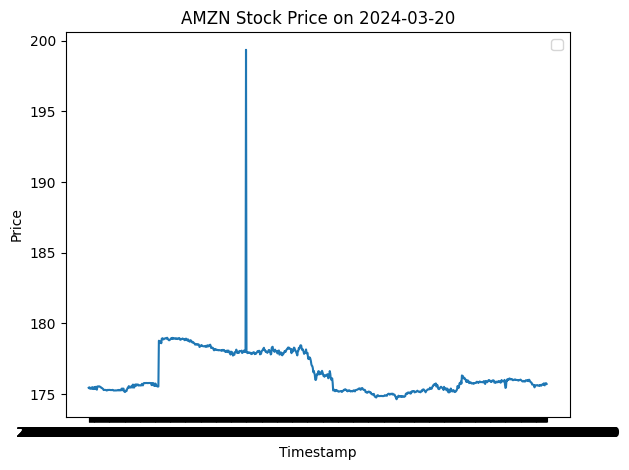

In [42]:
def plot_day(day):
    data = pdf[pdf['Date'] == day]
    plt.title('AMZN Stock Price on ' + str(day))
    plt.ylabel('Price')
    plt.xlabel('Timestamp')
    plt.plot(data['Timestamp'], data['Close'])
    plt.legend()
    plt.tight_layout()
    plt.show()

pct_growth = 0.1
time_period = '3600'
growth_days = gdf[gdf[time_period] >= pct_growth]['Date'].unique()
day = growth_days[0]
plot_day(day)